In [1]:
from utility_bferror import *
import datetime

tb = BFSolver_Toolbox()
er = BFSovler3D_Error()

# 1. Try One Case

In [2]:
i = 0

ndata,ndataVar = er.ndata[i],er.ndataVar[i]
nmcbg,nmcbgVar = er.nmcbg[i],er.nmcbgVar[i]
nfake,nfakeVar = er.nfake[i],er.nfakeVar[i]
a,aVar = er.a[i],er.aVar[i]
aVar[a<0.001] = np.zeros_like(a)[a<0.001]

slv0 = BFSolver3D(a)
br0 = slv0.solveQuadEqn(slv0.setMeasuredX(nData=ndata, nMcbg=nmcbg+nfake))
print(br0)

[0.10757808 0.11075555 0.10945892]


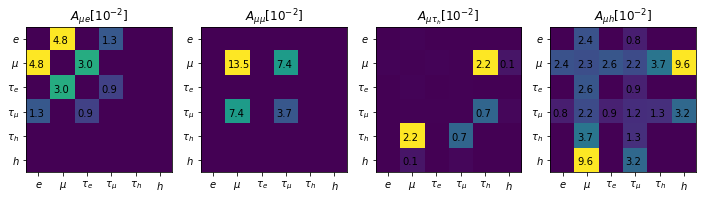

In [3]:
trigger = 'mu'
tb.imshow4Matrix(a,trigger)

# 2. Calculate Statistical Error

In [4]:
total = np.zeros([4,1,3])

In [5]:
# statistics
err = [ er.errStat(source) for source in ["data","mcbg","fake","mcsg"] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

0.541,0.511,1.192, 0.966,0.861,1.970, 0.701,0.547,1.423, 1.222,0.962,2.382
0.062,0.137,0.276, 0.065,0.124,0.322, 0.170,0.074,0.320, 0.158,0.059,0.209
0.005,0.005,0.011, 0.008,0.008,0.014, 0.006,0.006,0.014, 0.009,0.009,0.016
0.163,0.147,0.395, 0.258,0.228,0.589, 0.207,0.172,0.491, 0.318,0.262,0.697


In [6]:
# sysCrossSection
err = [ er.errSystem_crossSection(source) for source in ["mcbg","fake","mctt","mctw"] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

0.266,0.372,0.110, 0.085,0.068,0.023, 0.205,0.273,0.141, 0.044,0.093,0.083
0.333,0.341,0.697, 0.224,0.219,0.381, 0.219,0.217,0.459, 0.117,0.115,0.204
0.007,0.004,0.103, 0.003,0.008,0.052, 0.008,0.010,0.112, 0.008,0.006,0.006
0.008,0.004,0.107, 0.003,0.009,0.054, 0.009,0.011,0.117, 0.009,0.006,0.006


In [7]:
# sysObjectEff
err = [ er.errSystem_objectEff(source) for source in ["e","mu","tauID",'jetMisTauID'] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

1.013,0.094,0.080, 1.036,0.095,0.075, 1.076,0.109,0.089, 1.029,0.103,0.080
0.135,1.170,0.123, 0.126,1.065,0.106, 0.108,1.028,0.105, 0.110,1.027,0.101
0.719,0.874,4.457, 0.693,0.825,4.301, 0.683,0.825,4.469, 0.649,0.795,4.374
0.663,0.805,4.109, 0.510,0.607,3.166, 0.633,0.765,4.144, 0.469,0.575,3.161


In [8]:
# sysEnergyScale
err = [ er.errSystem_energyScale(source) for source in ["E","Mu","Tau"] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

0.000,0.000,0.000, 0.000,0.000,0.000, 0.110,0.214,0.048, 0.121,0.211,0.036
0.198,0.242,0.018, 0.232,0.269,0.036, 0.000,0.000,0.000, 0.000,0.000,0.000
0.294,0.357,1.821, 0.242,0.288,1.501, 0.275,0.332,1.799, 0.232,0.285,1.565


In [9]:
# errSystem_ttTheory
err = [ er.errSystem_upDownVariation(source) for source in [ "ISR","FSR","UE","MEPS"] ]
err[0] = err[0]/(0.1108*1.5/0.0011)
err[1] = err[1]/(0.1108*1.5/0.0011)
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

#total = np.concatenate( (total,err),axis=1 )

0.003,0.004,0.026, 0.008,0.005,0.024, 0.001,0.007,0.022, 0.005,0.005,0.017
0.032,0.035,0.148, 0.019,0.030,0.114, 0.029,0.032,0.147, 0.029,0.029,0.105
0.189,0.676,1.242, 0.110,0.672,1.762, 0.351,0.259,0.915, 0.454,0.143,0.874
0.470,1.038,1.708, 1.114,0.637,0.778, 0.615,1.757,1.983, 1.116,0.448,3.923


In [10]:
# sysJet
err = [ er.errSystem_upDownVariation(source) for source in ["JES","JER","BTag","Mistag"] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

#total = np.concatenate( (total,err),axis=1 )

1.794,1.324,3.635, 1.682,1.509,2.805, 1.374,1.729,3.818, 1.626,1.607,2.737
0.133,0.043,0.420, 0.144,0.154,0.297, 0.116,0.168,0.397, 0.171,0.166,0.212
0.110,0.437,0.626, 0.161,0.251,0.034, 0.325,0.179,0.645, 0.318,0.163,0.112
0.141,0.145,0.003, 0.158,0.100,0.231, 0.078,0.108,0.140, 0.127,0.158,0.138


In [11]:
# sysLHE
err = [ er.errSystem_upDownVariation(source) for source in ["Renorm","Factor","PDF"] ]
err = np.array(err).transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

total = np.concatenate( (total,err),axis=1 )

1.847,1.879,1.989, 1.891,1.906,1.919, 1.840,1.830,2.014, 1.876,1.884,1.880
0.430,0.430,0.560, 0.459,0.443,0.458, 0.422,0.429,0.575, 0.432,0.453,0.504
0.407,0.415,0.452, 0.411,0.416,0.414, 0.407,0.409,0.450, 0.409,0.413,0.415


In [12]:
er.io_printErrorForExcelFormat(total)

0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000
0.541,0.511,1.192, 0.966,0.861,1.970, 0.701,0.547,1.423, 1.222,0.962,2.382
0.062,0.137,0.276, 0.065,0.124,0.322, 0.170,0.074,0.320, 0.158,0.059,0.209
0.005,0.005,0.011, 0.008,0.008,0.014, 0.006,0.006,0.014, 0.009,0.009,0.016
0.163,0.147,0.395, 0.258,0.228,0.589, 0.207,0.172,0.491, 0.318,0.262,0.697
0.266,0.372,0.110, 0.085,0.068,0.023, 0.205,0.273,0.141, 0.044,0.093,0.083
0.333,0.341,0.697, 0.224,0.219,0.381, 0.219,0.217,0.459, 0.117,0.115,0.204
0.007,0.004,0.103, 0.003,0.008,0.052, 0.008,0.010,0.112, 0.008,0.006,0.006
0.008,0.004,0.107, 0.003,0.009,0.054, 0.009,0.011,0.117, 0.009,0.006,0.006
1.013,0.094,0.080, 1.036,0.095,0.075, 1.076,0.109,0.089, 1.029,0.103,0.080
0.135,1.170,0.123, 0.126,1.065,0.106, 0.108,1.028,0.105, 0.110,1.027,0.101
0.719,0.874,4.457, 0.693,0.825,4.301, 0.683,0.825,4.469, 0.649,0.795,4.374
0.663,0.805,4.109, 0.510,0.607,3.166, 0.633,0.765,4.144, 0.469,0.575,3.161
0.000,0.000,0.000, 0.000,